In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
import pandas as pd

In [36]:
import nltk
nltk.download("stopwords")
#--------#

from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
import re


def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

def preprocess_text(text):
    mystem = Mystem()
    russian_stopwords = stopwords.words("russian")
    russian_stopwords += ['это', 'да', 'просто', 'ну', 'ага']
    # tokens = mystem.lemmatize(text.lower())
    text = re.sub(r"\[(.*?)\]", "", text)
    
    tokens = remove_punctuation(text.lower()).split()
    tokens = [token for token in tokens if token.strip() not in russian_stopwords and token != " "]
    
    
    text = " ".join(tokens)
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\koval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
with open('../data/result.json', 'rb') as file:
    raw_data = file.read()
    message_history = json.loads(raw_data)

In [4]:
messages = message_history['messages']

In [5]:
df = pd.DataFrame(messages)
df.head()

,id,type,date,from,from_id,text,edited,file,media_type,mime_type,...,title,live_location_period_seconds,poll,to,to_id,distance,message_id,contact_information,contact_vcard,emoticon
0,26,message,2016-03-20T19:22:34,Святослав Ковалев,user199657479,"здрасьте, здрасьте)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,message,2016-03-20T19:23:20,Настюша,user198049876,И вот зачем он мне?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28,message,2016-03-20T19:23:50,Настюша,user198049876,Чтобы я погрузилась в английский?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29,message,2016-03-20T19:24:02,Святослав Ковалев,user199657479,"ну, ты же учишь его)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,message,2016-03-20T19:24:02,Настюша,user198049876,А еще здесь виден канадаш,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def get_text_from_df(df):
    all_text_messages = df.text.astype(str).tolist()
    return ' '.join(all_text_messages)

In [42]:
def draw_text(text, **kwargs):
    image = WordCloud().generate(text)
    plt.figure(figsize=(20, 20), **kwargs)
    plt.axis('off')
    plt.imshow(image)

In [20]:
def draw_text_from_df(df):
    draw_text(preprocess_text(get_text_from_df(df)))

In [21]:
df['date'] = pd.to_datetime(df.date)

In [55]:
last_year_df = df[df.date > '2016-01-01']

In [56]:
my_messages = last_year_df[last_year_df['from'] == 'Святослав Ковалев']
your_messages = last_year_df[last_year_df['from'] == 'Настюша']

In [57]:
text = get_text_from_df(my_messages)

In [58]:
preprocessed_text = preprocess_text(text)

In [59]:
pd.DataFrame(preprocessed_text.split()).value_counts().head(50)

3            13332
очень         6178
тебе          4256
сегодня       3591
знаю          2944
буду          2827
ладно         2470
завтра        2306
чтото         2122
пойду         2105
могу          1987
вообще        1961
люблю         1956
ещё           1947
хочу          1889
пока          1844
думаю         1786
настя         1764
спать         1736
тобой         1545
почему        1535
наверное      1493
такое         1435
делать        1401
кстати        1378
зая           1376
снов          1278
прости        1265
сладких       1262
нужно         1260
сказал        1248
спасибо       1228
хотя          1221
нормально     1211
ахахах        1190
давай         1149
дома          1137
понимаю       1112
утро          1098
день          1092
понял         1077
поэтому       1028
доброе        1026
ахахахах      1007
время         1007
вчера          997
можешь         990
5              987
минут          972
нравится       956
dtype: int64

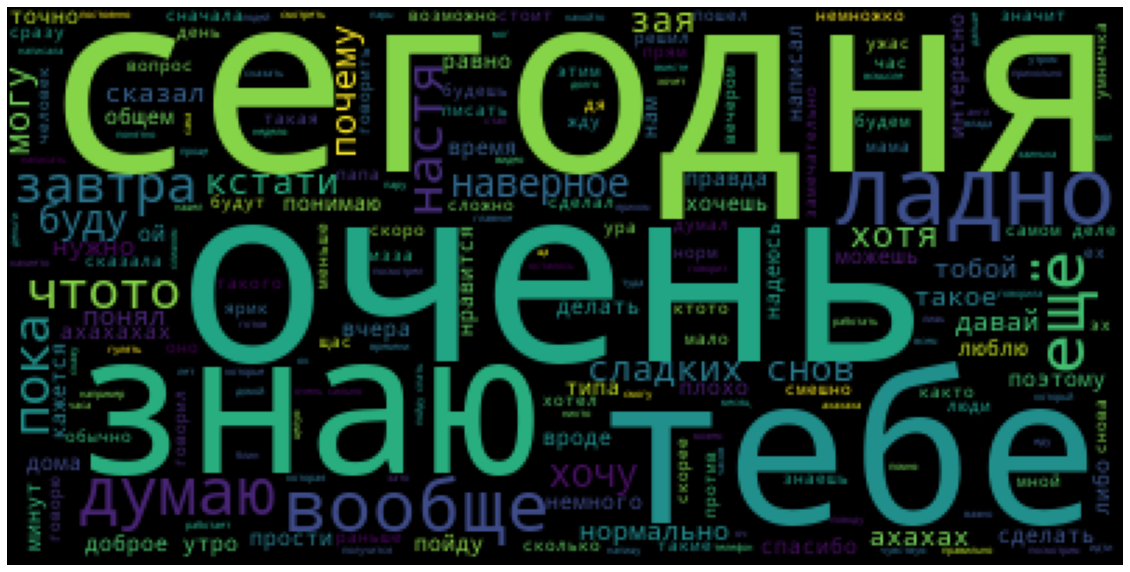

In [60]:
draw_text_from_df(my_messages)

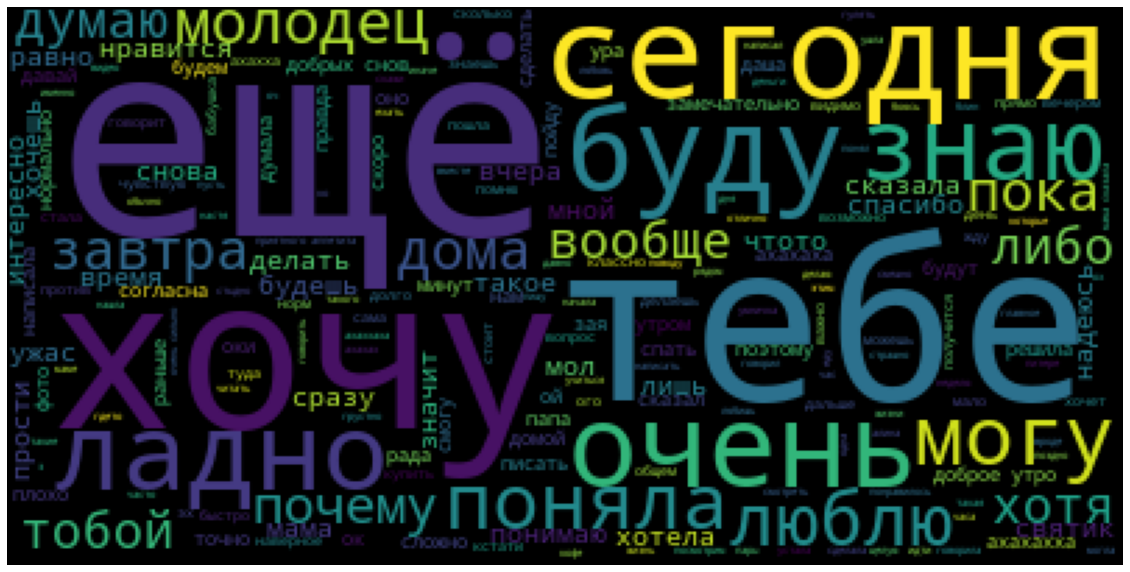

In [61]:
draw_text_from_df(your_messages)